In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### General info

In [2]:
df = pd.read_csv('C:/01.DSDE_proj/data/bangkok_traffy.csv', encoding='utf-8')

In [3]:
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
df.head()


ticket_id                 type                      organization  \
0  2021-FYJTFP          {ความสะอาด}                        เขตบางซื่อ   
1  2021-CGPMUN  {น้ำท่วม,ร้องเรียน}      เขตประเวศ,ฝ่ายโยธา เขตประเวศ   
2  2021-7XATFA              {สะพาน}                           เขตสาทร   
3  2021-9U2NJT            {น้ำท่วม}    เขตบางซื่อ,ฝ่ายโยธา เขตบางซื่อ   
4  2021-DVEWYM        {น้ำท่วม,ถนน}  เขตลาดพร้าว,ฝ่ายโยธา เขตลาดพร้าว   

                                             comment  \
0                                            ขยะเยอะ   
1  น้ำท่วมเวลาฝนตกและทะลุเข้าบ้านเดือดร้อนมากทุกๆ...   
2    สะพานลอยปรับปรุงไม่เสร็จตามกำหนด\nปากซอย สาทร12   
3                                            น้ำท่วม   
4  ซอยลาดพร้าววังหิน 75 ถนนลาดพร้าววังหิน แขวงลาด...   

                                               photo  \
0  https://storage.googleapis.com/traffy_public_b...   
1  https://storage.googleapis.com/traffy_public_b...   
2  https://storage.googleapis.com/traffy_public_b...   
3  https://storage.googleapis.com/traffy_public_b...   
4  https://storage.googleapis.com/traffy_public_b...   

                                         photo_after              coords  \
0                                                NaN  100.53084,13.81865   
1  https://storage.googleapis.com/traffy_public_b...  100.66709,13.67891   
2                                                NaN  100.52649,13.72060   
3  https://storage.googleapis.com/traffy_public_b...  100.53099,13.81853   
4                                                NaN  100.59165,13.82280   

                                             address subdistrict  district  \
0  12/14 ถนน กรุงเทพ- นนทบุรี แขวง บางซื่อ เขตบาง...         NaN       NaN   
1  189 เฉลิมพระเกียรติ ร.9 แขวง หนองบอน เขต ประเว...     หนองบอน    ประเวศ   
2  191/1 ถนน สาทรเหนือ แขวง สีลม เขตบางรัก กรุงเท...     ยานนาวา      สาทร   
3  12/14 ถนน กรุงเทพ- นนทบุรี แขวง บางซื่อ เขตบาง...         NaN       NaN   
4  702 ถ. ลาดพร้าววังหิน แขวงลาดพร้าว เขตลาดพร้าว...    ลาดพร้าว  ลาดพร้าว   

        province                      timestamp      state  star  \
0  กรุงเทพมหานคร  2021-09-03 12:51:09.453003+00  เสร็จสิ้น   NaN   
1  กรุงเทพมหานคร  2021-09-19 14:56:08.924992+00  เสร็จสิ้น   4.0   
2  กรุงเทพมหานคร  2021-09-26 05:03:52.594898+00  เสร็จสิ้น   NaN   
3  กรุงเทพมหานคร  2021-10-14 10:45:27.713884+00  เสร็จสิ้น   NaN   
4  กรุงเทพมหานคร  2021-12-09 12:29:08.408763+00  เสร็จสิ้น   5.0   

   count_reopen                  last_activity  
0             0  2022-06-04 15:34:14.609206+00  
1             0  2022-06-21 08:21:09.532782+00  
2             0  2022-06-06 01:17:12.272904+00  
3             0  2022-09-08 08:35:43.784519+00  
4             0  2022-08-12 07:18:44.884945+00

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787026 entries, 0 to 787025
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ticket_id      778254 non-null  object 
 1   type           786929 non-null  object 
 2   organization   786455 non-null  object 
 3   comment        778254 non-null  object 
 4   photo          786911 non-null  object 
 5   photo_after    641309 non-null  object 
 6   coords         787026 non-null  object 
 7   address        778254 non-null  object 
 8   subdistrict    786460 non-null  object 
 9   district       786465 non-null  object 
 10  province       786831 non-null  object 
 11  timestamp      787026 non-null  object 
 12  state          787026 non-null  object 
 13  star           274097 non-null  float64
 14  count_reopen   787026 non-null  int64  
 15  last_activity  787026 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 96.1+ MB


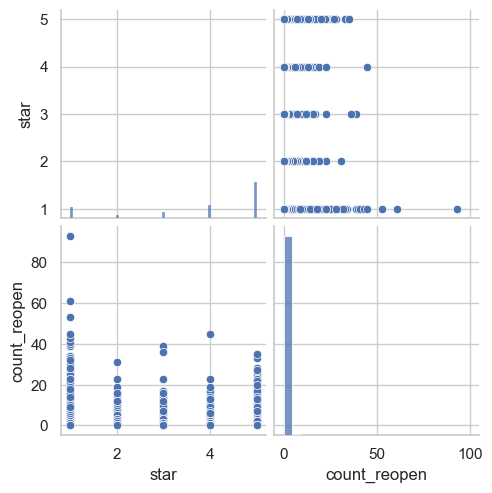

In [5]:
sns.pairplot(df)

### Check missing values

In [6]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Missing values:\n", missing)
print("\n------------------------------------------\n")
print("Duplicate rows:", df.duplicated().sum())

Missing values:
 star            512929
photo_after     145717
ticket_id         8772
comment           8772
address           8772
organization       571
subdistrict        566
district           561
province           195
photo              115
type                97
dtype: int64

------------------------------------------

Duplicate rows: 0


<Axes: >

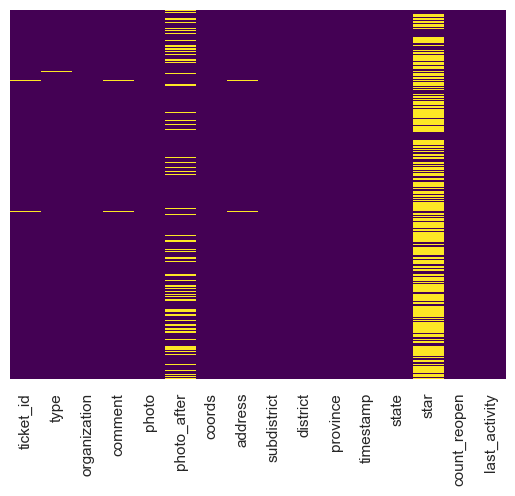

In [7]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Numeric features

### *Star*

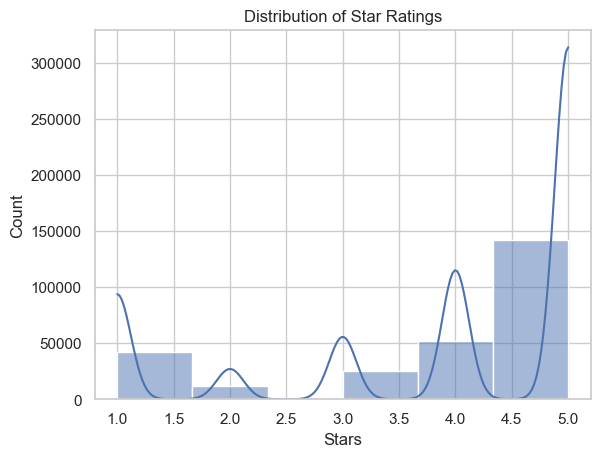

In [8]:
sns.histplot(df['star'].dropna(), bins=6, kde=True)
plt.title('Distribution of Star Ratings')
plt.xlabel('Stars')
plt.show()

### *reopen*

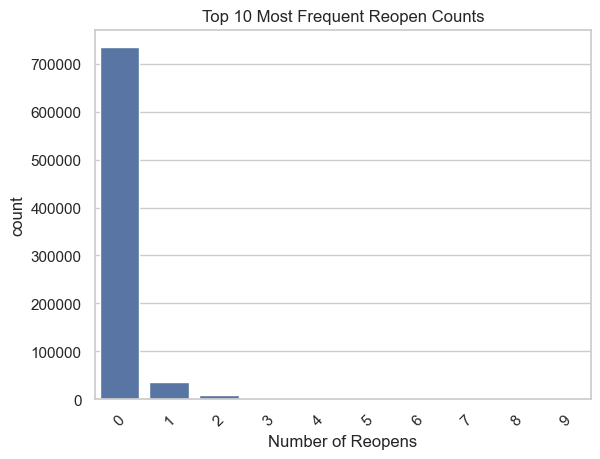

In [9]:
top_values = df['count_reopen'].value_counts().nlargest(10).index
sns.countplot(x='count_reopen', data=df[df['count_reopen'].isin(top_values)])
plt.title('Top 10 Most Frequent Reopen Counts')
plt.xlabel('Number of Reopens')
plt.xticks(rotation=45)
plt.show()

### Categorical Features

### *type*

Top 10 type count

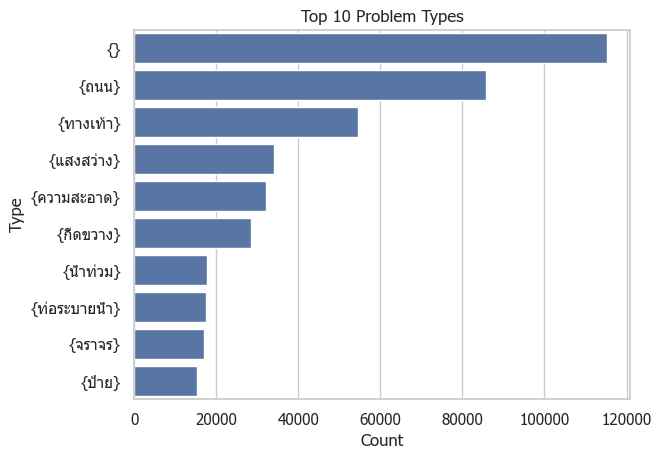

In [10]:
top_types = df['type'].value_counts().head(10)
plt.rcParams['font.family'] = 'Tahoma'
plt.rcParams['axes.unicode_minus'] = False  # เพื่อให้ - แสดงถูกในกราฟ
sns.barplot(y=top_types.index, x=top_types.values)
plt.title('Top 10 Problem Types')
plt.xlabel('Count')
plt.ylabel('Type')
plt.show()

### *organization*

Top 10 ปัญหาของแต่ละฝ่าย + เขต

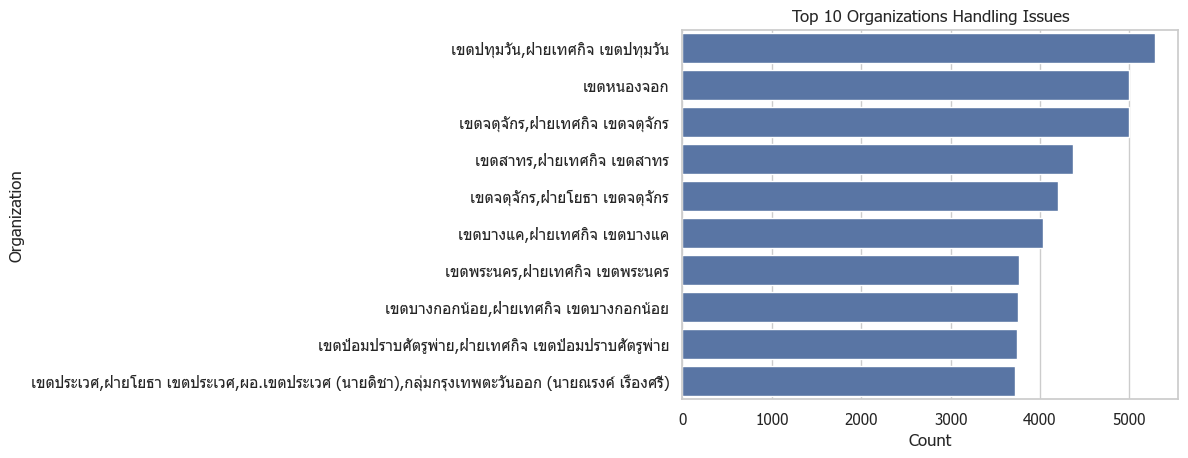

In [11]:
top_orgs = df['organization'].value_counts().head(10)
sns.barplot(y=top_orgs.index, x=top_orgs.values)
plt.title('Top 10 Organizations Handling Issues')
plt.xlabel('Count')
plt.ylabel('Organization')
plt.show()

### *state*

บอกประเภทstate + count

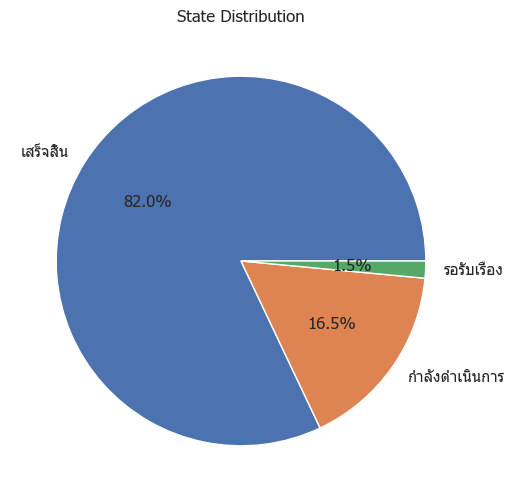

In [12]:
df['state'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title('State Distribution')
plt.ylabel('')
plt.show()

### Timestamps

### จำนวนปัญหาในแต่ละเดือน

C:\Users\User\AppData\Local\Temp\ipykernel_14028\1052659480.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['timestamp'].dt.to_period('M')


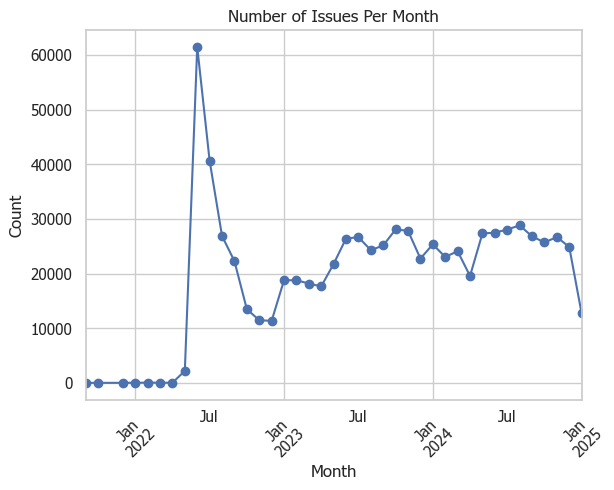

In [13]:
df['timestamp'] = pd.to_datetime(df['timestamp'],format='mixed', utc=True)

df['last_activity'] = pd.to_datetime(df['last_activity'],format='mixed', utc=True)

df['month'] = df['timestamp'].dt.to_period('M')
monthly_counts = df['month'].value_counts().sort_index()

monthly_counts.plot(kind='line', marker='o')
plt.title('Number of Issues Per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### การแจ้งปัญหาต่อวัน

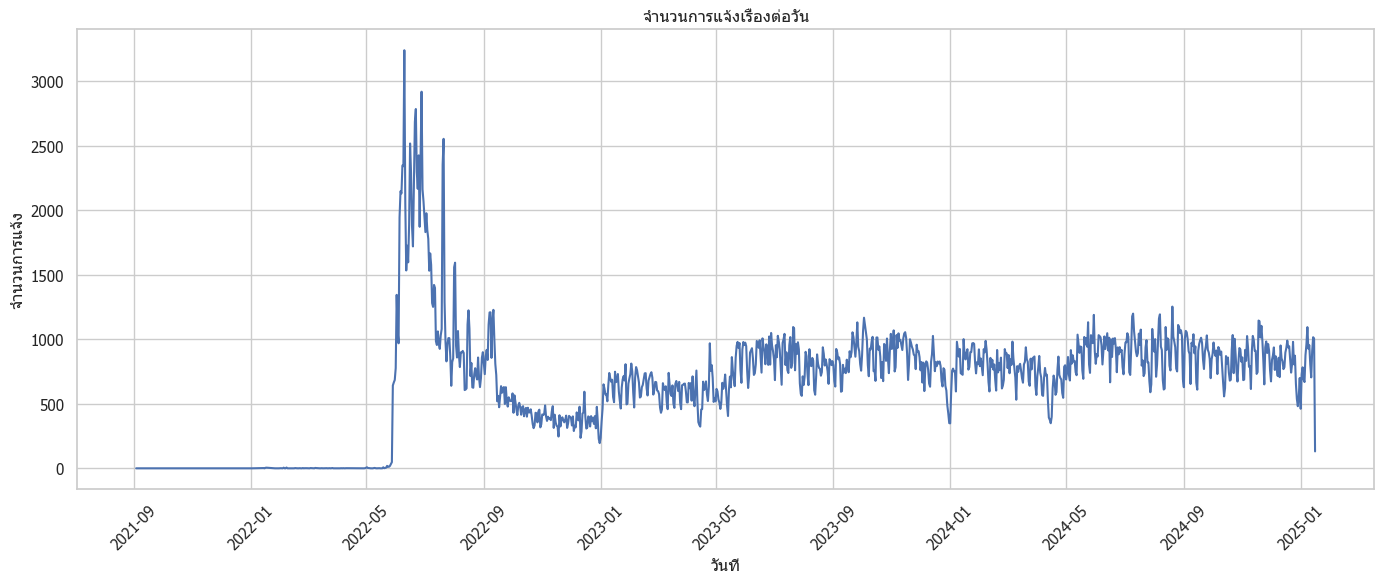

In [14]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# สร้างคอลัมน์ date เฉพาะวันที่ (ไม่เอาเวลา)
df['report_date'] = df['timestamp'].dt.date

# นับจำนวนแจ้งเรื่องในแต่ละวัน
daily_reports = df['report_date'].value_counts().sort_index()

# วาดกราฟ
plt.figure(figsize=(14,6))
sns.lineplot(x=daily_reports.index, y=daily_reports.values)
plt.title('จำนวนการแจ้งเรื่องต่อวัน')
plt.xlabel('วันที่')
plt.ylabel('จำนวนการแจ้ง')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Performance ของแต่ละช่วง
แกน x: avg วันที่ปิดปัญหา
แกน y: วันที่เปิดปัญหานั้นๆ


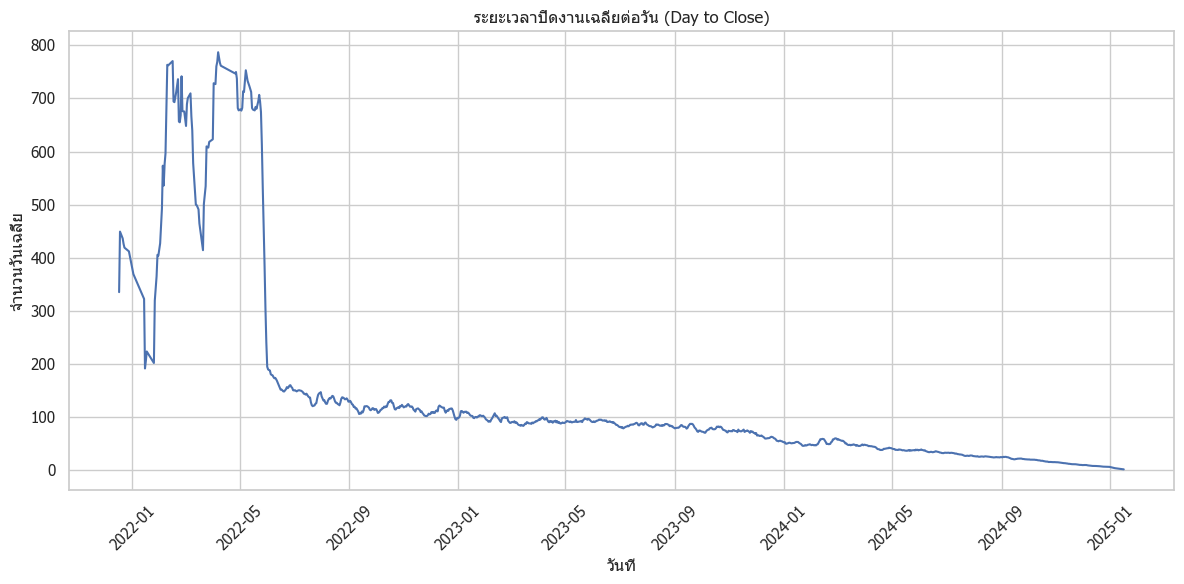

In [15]:
# สร้างคอลัมน์วันที่ + คำนวณ day to close
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)
df['last_activity'] = pd.to_datetime(df['last_activity'], utc=True)
df['days_to_close'] = (df['last_activity'] - df['timestamp']).dt.days

# group by วันที่สร้าง แล้วหาค่าเฉลี่ยของ days_to_close
df['date'] = df['timestamp'].dt.date
avg_days = df.groupby('date')['days_to_close'].mean().reset_index()
avg_days['rolling_avg'] = avg_days['days_to_close'].rolling(window=7).mean()


# plot line chart
plt.figure(figsize=(12,6))
sns.lineplot(data=avg_days, x='date', y='rolling_avg')
plt.title('ระยะเวลาปิดงานเฉลี่ยต่อวัน (Day to Close)')
plt.xlabel('วันที่')
plt.ylabel('จำนวนวันเฉลี่ย')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Count จำนวนวันที่ปิดแต่ละปัญหา

0         274
1         274
2         252
3         328
4         245
         ... 
787021      0
787022      0
787023      0
787024      0
787025      0
Name: duration_days, Length: 787026, dtype: int64


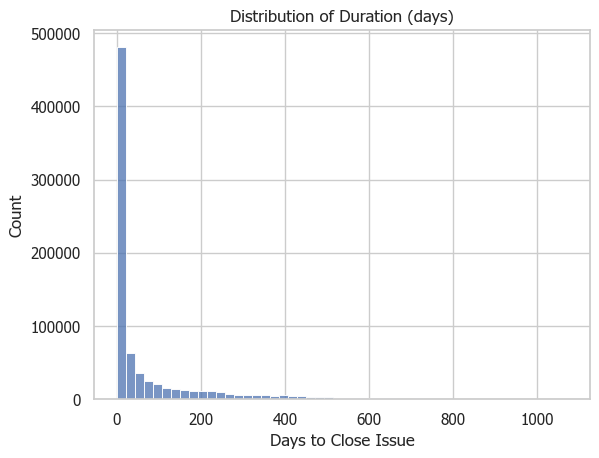

In [16]:
df['duration_days'] = (df['last_activity'] - df['timestamp']).dt.days
print(df['duration_days'])
sns.histplot(df['duration_days'], bins=50)
plt.title('Distribution of Duration (days)')
plt.xlabel('Days to Close Issue')
plt.show()

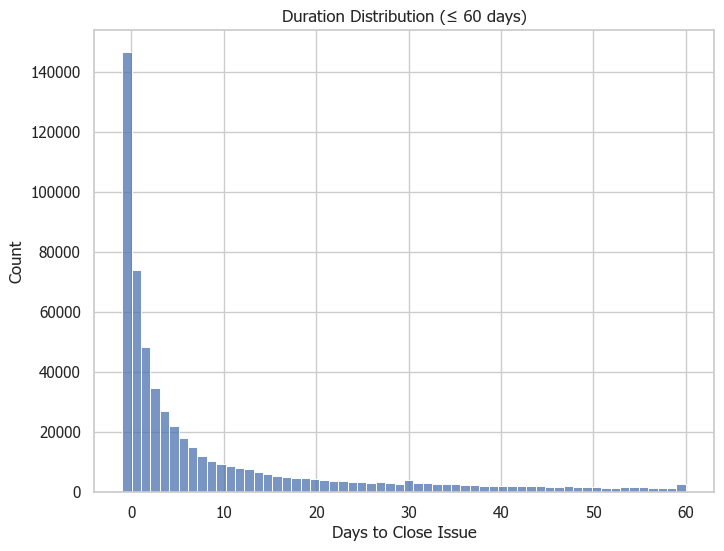

In [17]:
plt.figure(figsize=(8,6))
sns.histplot(df[df['duration_days'] <= 60]['duration_days'], bins=60)
plt.title('Duration Distribution (≤ 60 days)')
plt.xlabel('Days to Close Issue')
plt.ylabel('Count')
plt.show()

In [18]:
# HISTOGRAM
fig_hist = px.histogram(df, x='duration_days', nbins=50,
                        title="Histogram ของ duration (วัน)",
                        labels={'duration_days': 'เวลาในการจัดการปัญหา (วัน)'})
fig_hist.update_layout(bargap=0.1)
fig_hist.show()

# BOXPLOT
fig_box = px.box(df, y='duration_days',
                 title="Boxplot ของ duration (ค่าจริง)",
                 labels={'duration_days': 'เวลาในการจัดการปัญหา (วัน)'})
fig_box.show()


### การแจ้งปัญหาแต่ละTypeต่อวัน(ลองเปลี่ยน target type เอง)

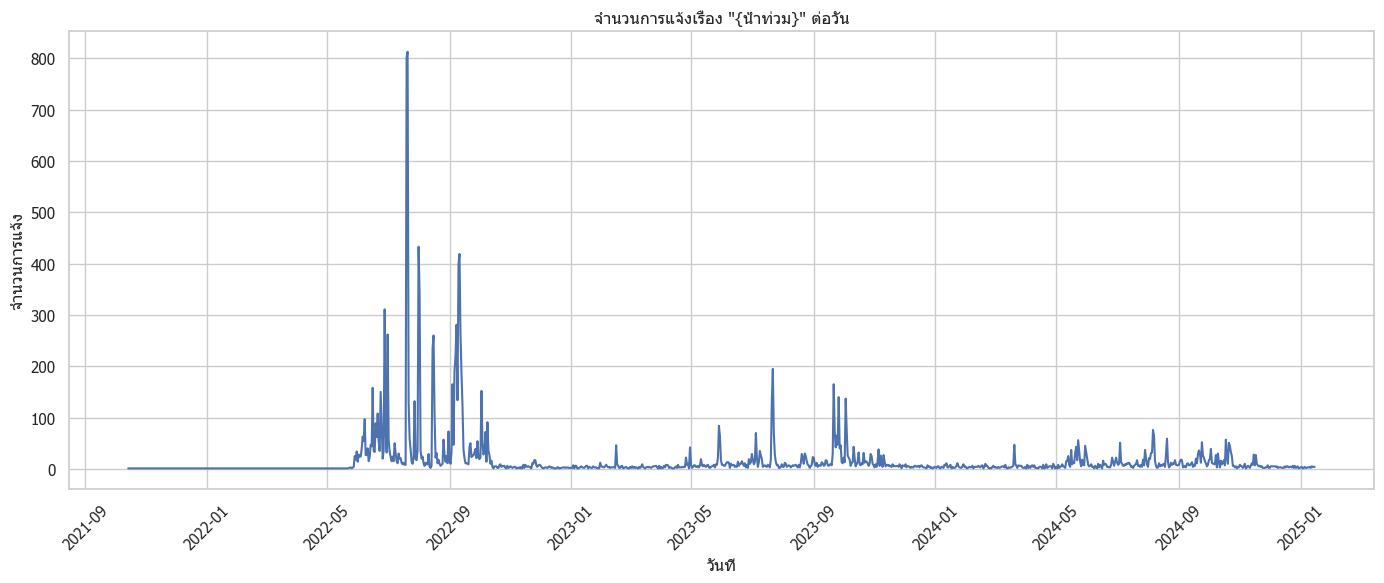

In [19]:
# กำหนด type ที่อยากดู เช่น "ถนนชำรุด"
target_type = "{น้ำท่วม}"

# กรองเฉพาะ type ที่สนใจ
df_type = df[df['type'] == target_type].copy()

# แปลง timestamp เป็น datetime
df_type['timestamp'] = pd.to_datetime(df_type['timestamp'], errors='coerce')

# สร้างคอลัมน์ date
df_type['report_date'] = df_type['timestamp'].dt.date

# นับจำนวนต่อวัน
daily_type_reports = df_type['report_date'].value_counts().sort_index()

# วาดกราฟ
plt.figure(figsize=(14,6))
sns.lineplot(x=daily_type_reports.index, y=daily_type_reports.values)
plt.title(f'จำนวนการแจ้งเรื่อง "{target_type}" ต่อวัน')
plt.xlabel('วันที่')
plt.ylabel('จำนวนการแจ้ง')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Count TOP 3 ปัญหาในแต่ละเขต(top 30 เขต)

In [20]:
# กรอง type ที่ไม่ใช่ {}
data = df[df['type'] != '{}']

# เลือก top 30 district
top_districts = data['district'].value_counts().nlargest(30).index
filtered = data[data['district'].isin(top_districts)]

# Group แล้วหา top 3 ของแต่ละ district
top_types_by_district = (
    filtered.groupby(['district', 'type'])
    .size()
    .reset_index(name='count')
    .sort_values(['district', 'count'], ascending=[True, False])
    .groupby('district')
    .head(3)
)

top_types_by_district_table = pd.pivot_table(
    top_types_by_district, 
    values='count', 
    index='district', 
    columns='type', 
    aggfunc='sum', 
    fill_value=0
)

# แสดงตารางในแบบที่อ่านง่าย
top_types_by_district_table


type         {กีดขวาง}  {ความสะอาด}  {จราจร}  {ถนน}  {ทางเท้า}  {น้ำท่วม}  \
district                                                                    
คลองสามวา            0          807        0   2477          0          0   
คลองเตย           1360            0        0   2300       2507          0   
จตุจักร              0            0        0   4218       3516          0   
ดินแดง               0            0        0   2021       1530          0   
ธนบุรี               0            0        0   1650       1165          0   
บางกอกน้อย        1129            0        0   1590       3300          0   
บางกะปิ              0            0        0   2610       1434          0   
บางขุนเทียน          0            0        0   2371       1756        761   
บางซื่อ              0         1019        0   1718          0          0   
บางนา                0            0        0   1613       1000        662   
บางพลัด            997            0        0   1182       1268          0   
บางรัก             893            0        0   1706       1970          0   
บางเขน               0         1234        0   2356       1138          0   
บางแค                0            0        0   2106       1207          0   
บึงกุ่ม              0         1026        0   1699       1085          0   
ปทุมวัน           1513            0        0   1867       2926          0   
ประเวศ               0         2400        0   2871          0       1777   
พญาไท                0            0        0   1460       1155          0   
พระนคร             706            0        0   2065       1683          0   
มีนบุรี              0            0        0   1919        700          0   
ราชเทวี              0            0      746   2281       1552          0   
ลาดกระบัง            0          770        0   3372          0          0   
ลาดพร้าว             0          966        0   1885          0          0   
วังทองหลาง           0          576        0   1701       1030          0   
วัฒนา             1288            0        0   2425       2379          0   
สวนหลวง              0            0        0   2554        990          0   
สาทร              2543            0        0   1422       1325          0   
สายไหม               0         1324        0   1633          0          0   
หนองจอก              0          610        0   2780          0          0   
ห้วยขวาง             0            0        0   2194       1246          0   

type         {ป้าย}  {แสงสว่าง}  
district                         
คลองสามวา         0         741  
คลองเตย           0           0  
จตุจักร           0        1886  
ดินแดง            0         796  
ธนบุรี            0         641  
บางกอกน้อย        0           0  
บางกะปิ           0        1289  
บางขุนเทียน       0           0  
บางซื่อ           0         957  
บางนา             0           0  
บางพลัด           0           0  
บางรัก            0           0  
บางเขน            0           0  
บางแค          1309           0  
บึงกุ่ม           0           0  
ปทุมวัน           0           0  
ประเวศ            0           0  
พญาไท             0         977  
พระนคร            0           0  
มีนบุรี           0         746  
ราชเทวี           0           0  
ลาดกระบัง         0         759  
ลาดพร้าว          0         661  
วังทองหลาง        0           0  
วัฒนา             0           0  
สวนหลวง           0        1129  
สาทร              0           0  
สายไหม            0         493  
หนองจอก           0         833  
ห้วยขวาง          0        1145

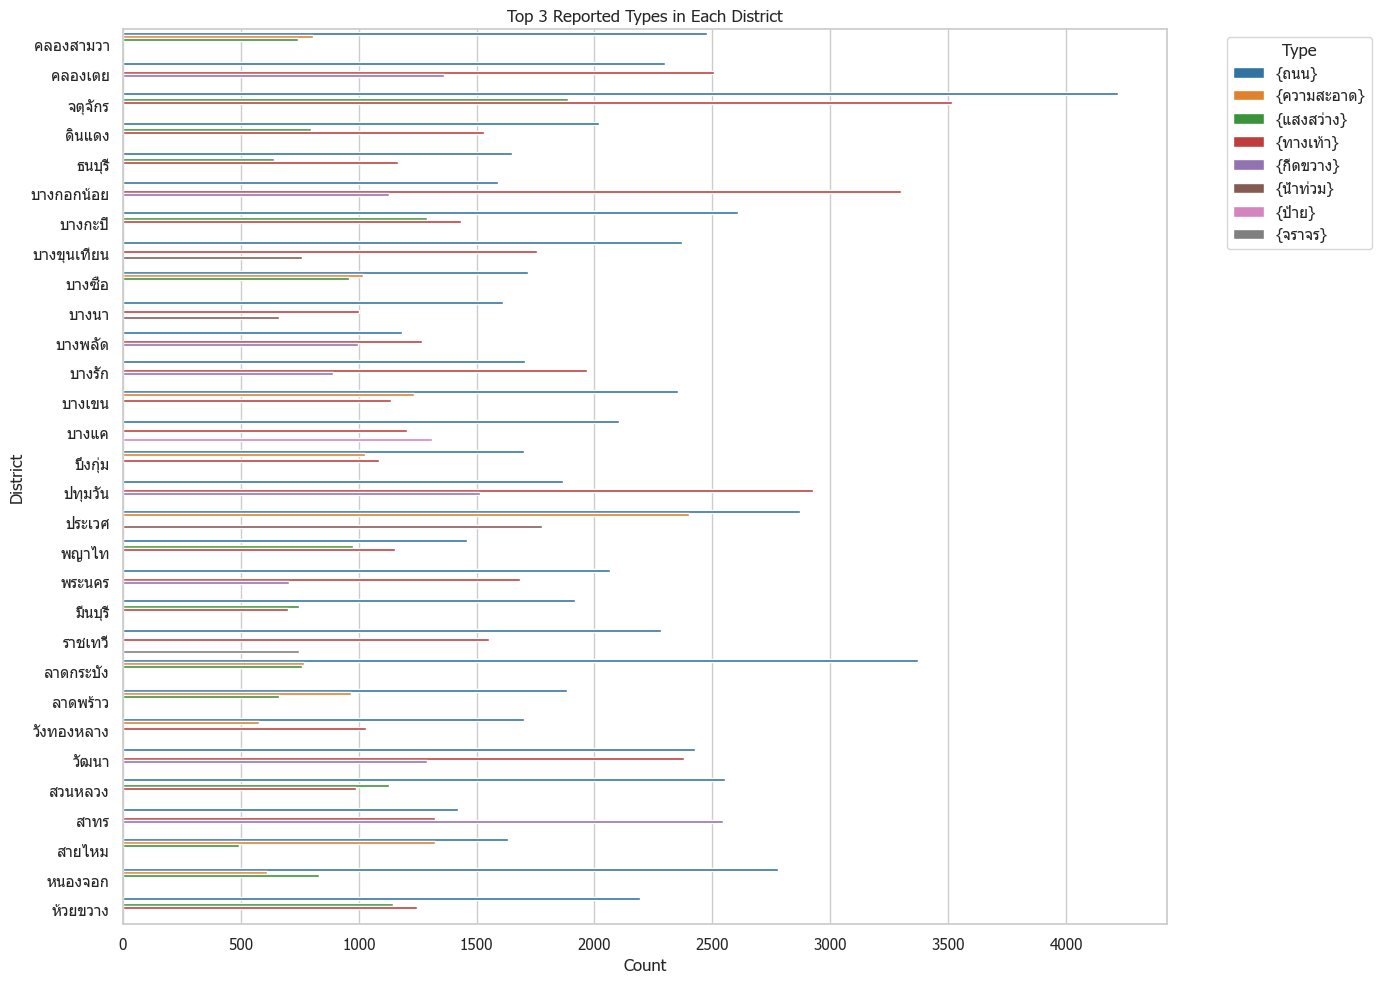

In [21]:
# Plot
plt.figure(figsize=(14,10))
sns.barplot(data=top_types_by_district, x='count', y='district', hue='type', palette='tab10')
plt.title('Top 3 Reported Types in Each District')
plt.xlabel('Count')
plt.ylabel('District')
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()